In [3]:
import matplotlib.pyplot as plt
import numpy as np
import soundfile as sf

from IPython.display import Audio
np.random.seed(13)

# Pitch

## Shift $\beta_0$ by $n$ half steps: 

### $$\beta_n=2^{\frac{n}{12}}\cdot\beta_0$$

In [12]:
def sine(vol, duration, hz, sr):
    assert duration > 0
    t = np.arange(0, duration, 1.0 / sr)
    return vol * np.sin(2 * np.pi * hz * t)


def square(vol, duration, hz, sr):
    assert duration > 0
    t = np.arange(0, duration, 1.0 / sr)
    scaled = t * hz
    rounded = np.round(scaled)
    diff = scaled - rounded
    geq = diff >= 0
    pos = 1.0 * geq
    neg = -1.0 * (~geq)
    return vol * (pos + neg)

def aug_note(vol, duration, hz, sr):
    """
    Add timbre
    """
    assert duration > 0
    t = np.arange(0, duration, 1.0 / sr)

    raw = sine(vol, duration, hz, sr)
    #add1 = .3 * vol * np.sin(2 * np.pi * hz * 2 ** (4 / 12) * t)
    #add1 = .3 * vol * square(vol, duration, hz * 2 ** (4 / 12), sr)
    #add2 = .3 * vol * square(vol, duration, hz * 2 ** (7 / 12), sr)
    return raw


def duh_nee_duh_noo(sample_rate):
    sample1 = aug_note(1, 2, 440, sample_rate)
    sample2 = aug_note(1, 2, 440 * 2 ** (1 / 12), sample_rate)
    sample3 = aug_note(1, 2, 440 * 2 ** (-2 / 12), sample_rate)
    sample4 = aug_note(1, 2, 440 * 2 ** (6 / 12), sample_rate)
    audio = sample1 + sample2 + sample3 + sample4
    audio /= np.max(audio)
    fig, ax = plt.subplots()
    ax.plot(audio)
    fig.savefig(f"{sample_rate}.png")
    sf.write(f"{sample_rate}.wav", audio, sample_rate)
    return audio

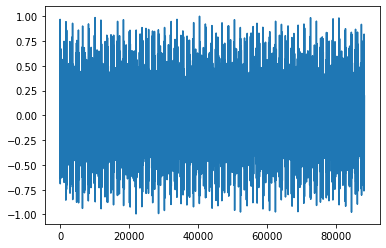

In [13]:
sample_rate = 44100
audio = duh_nee_duh_noo(sample_rate)
Audio(audio, rate=sample_rate)